### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [18]:
# Import Necessary Libraries
import pandas as pd

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [19]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df = pd.read_csv("hotel_reservations.csv")

# Display the number of rows and columns in the dataset
print(df.shape)

# Display the first few rows of the dataset to get an overview
df.head()

(36275, 19)


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [20]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
df = df.drop(columns=['booking_id', 'arrival_year', 'arrival_month','arrival_date'])
df.shape

(36275, 15)

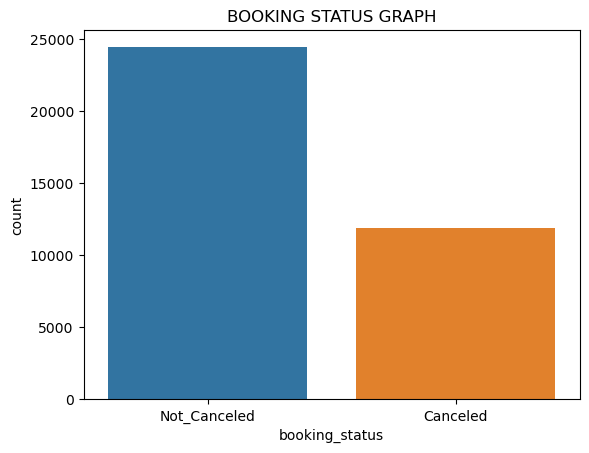

In [21]:
# Visualize the booking_status
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(df["booking_status"],)
plt.title("BOOKING STATUS GRAPH")
plt.show()

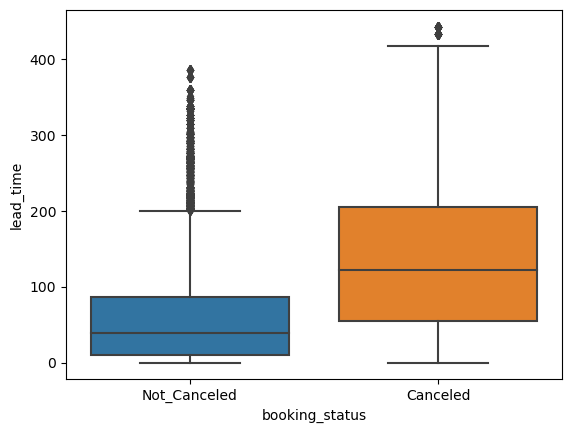

In [22]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.show()

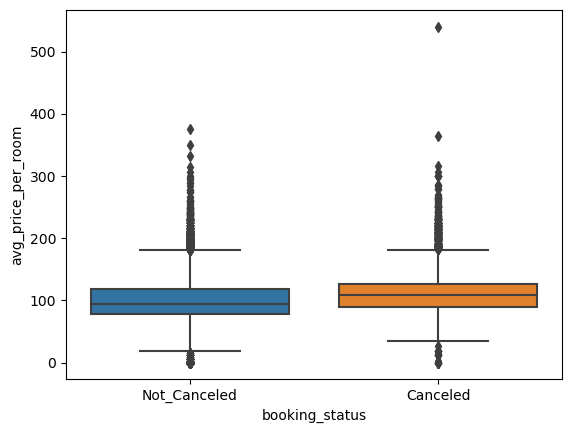

In [23]:
# Visualize the average price per room for canceled and not canceled bookingssns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.show() 


In [24]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.
df = pd.get_dummies(df,columns=['type_of_meal_plan', 'room_type_reserved','market_segment_type'], drop_first=True)


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [25]:
# Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])


# Define features(X) and target (y: booking_status)
X = df.drop("booking_status", axis = 1)
y = df["booking_status"]


### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [26]:
from sklearn.model_selection import KFold
# Initialize KFold with 7 splits.
kf = KFold(n_splits=7,shuffle=True,random_state=43)

from sklearn.model_selection import cross_val_score
import numpy as np

# Cross validation with Naive Bayes
from sklearn.naive_bayes import GaussianNB
cv_nb_score = cross_val_score(GaussianNB(),X,y,cv = kf , scoring = "accuracy" )
print("Naive Bayes Cross-Validation Accuracy: ",cv_nb_score.mean())


# Cross validation with Logistic Regression
from sklearn.linear_model import LogisticRegression
cv_lg_score = cross_val_score(LogisticRegression(),X,y,cv = kf , scoring = "accuracy" )
print("Logistic Regression Cross-Validation Accuracy: ",cv_lg_score.mean())




# Cross validation with Decision Tree
from sklearn.tree import DecisionTreeClassifier
cv_dt_score = cross_val_score(DecisionTreeClassifier(),X,y,cv = kf , scoring = "accuracy" )
print("Logistic Regression Cross-Validation Accuracy: ",cv_dt_score.mean())


Naive Bayes Cross-Validation Accuracy:  0.4082149857105657
Logistic Regression Cross-Validation Accuracy:  0.8002756816776583
Logistic Regression Cross-Validation Accuracy:  0.8554654829789233


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [27]:
# Initialize a StratifiedKFold cross-validator with 7 splits
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=43)
# Perform stratified k-fold cross-validation using Naive Bayes

cv_nb = cross_val_score(GaussianNB(),X,y,cv=skf ,scoring="accuracy")
print("Naive Bayes Stratified Cross-Validation Accuracy: ", cv_nb.mean())



# Perform stratified k-fold cross-validation using a Logistic Regression

cv_lg = cross_val_score(LogisticRegression(),X,y,cv=skf ,scoring="accuracy")
print("Logistic Tregression Stratified Cross-Validation Accuracy: ", cv_lg.mean())

# Perform stratified k-fold cross-validation using a Decision Tree classifier

cv_dt = cross_val_score(DecisionTreeClassifier(criterion="gini"),X,y,cv=skf ,scoring="accuracy")
print("Decision Tree Stratified Cross-Validation Accuracy: ", cv_dt.mean())

Naive Bayes Stratified Cross-Validation Accuracy:  0.4080771881461061
Logistic Tregression Stratified Cross-Validation Accuracy:  0.8003859407305308
Decision Tree Stratified Cross-Validation Accuracy:  0.8525706409372846


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [29]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model_params = {
    "naive_baiyes" : {
        "model" : GaussianNB(),
        "params":{
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    "Random_Forest" : {
        "model" : RandomForestClassifier(),
        "params":{
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]
        }
    }


    
}


# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []
for key,val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X,y)
    scores.append({
        "model" : key ,
        "best_score" : clf.best_score_,
        "best_param" : clf.best_params_
    })


# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_param"])
df_scores

,model,best_score,best_param
0,naive_baiyes,0.409483,{'var_smoothing': 1e-07}
1,Random_Forest,0.877795,"{'max_depth': 15, 'n_estimators': 50}"


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [30]:
# Initialize RandomizedSearchCV and fit with RandomForest model
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
    cv=7,
    return_train_score=False,
    n_iter=3
)
clf.fit(X, y)

# Print Best Parameters
print("Best Parameters for Random Forest (RandomizedSearchCV): ", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df



Best Parameters for Random Forest (RandomizedSearchCV):  {'n_estimators': 50, 'max_depth': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,2.581884,0.017877,0.101866,0.001095,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.890218,0.889039,0.887881,0.889039,0.892127,0.879197,0.886144,0.887664,0.003859,1
1,3.195377,0.050764,0.110328,0.003448,100,10,"{'n_estimators': 100, 'max_depth': 10}",0.865715,0.863373,0.850444,0.857005,0.859321,0.849286,0.850251,0.856485,0.006189,3
2,0.594445,0.026166,0.034590,0.004266,10,20,"{'n_estimators': 10, 'max_depth': 20}",0.883658,0.886916,0.877074,0.879969,0.884986,0.879390,0.883057,0.882150,0.003207,2
